# 数据处理01：Python编程笔记本Jupyter
Jupyter Notebook 是计算和文档一体化的编程笔记本，它不只是把 IPython 放进浏览器而已，还能将代码、文本、表格、公式以及图形都集成在同一网页之中，作为连接与整合多种资源的在线门户。如果放到公网主机上，就能在任何地方随时使用，是进行数据处理的必备神器。项目官网 https://jupyter.org/
![01_jupyter.png](https://upload-images.jianshu.io/upload_images/10829283-41fdffd6e914b41a.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

Jupyter Notebook 可通过 Anaconda Navigator 启动，程序在后台运行并自动用浏览器打开主页面，显示当前用户目录的内容——更快捷的启动方式是直接输入以下命令，这样主页面显示的将是当前目录（按 Ctrl+C 结束运行）：
```
jupyter notebook
```

Jupyter Notebook 每次启动会随机生成一个凭据用作安全验证，你可以输入以下命令设置一个登录密码以方便使用：
```
jupyter notebook password
```

Jupyter Notebook 专用文件格式为 IPython 笔记本（.ipynb），点击主页面右上方的“新建”按钮即可创建笔记本。笔记本页面主要由代码单元格组成，一个代码单元格就是一次 IPython 交互，你可以在其中输入 Python 程序并运行，运行结果将在页面中显示；另一种常用组件是标记单元格，其中可以使用 MarkDown 标记编写带格式的文档，运行标记单元格将显示排版后的效果——MarkDown 标记非常简单，这里列出常用的几种，更多介绍可参阅 http://www.markdown.cn/
```
# 一级标题
## 二级标题
正文段落

正文段落
- 列表
- 列表
1. 编号列表
2. 编号列表
[链接](abc.ipynb)
![图片](xyz.jpg)
```

在笔记本页面中可以使用热键进行快捷操作，主要有下面这些：
- H 显示热键列表
- A/B 在上/下插入单元格
- M/Y 改为标记/代码单元格
- Enter/Esc 进入/退出编辑单元格
- Tab/Shift+Tab 代码补全/提示
- Ctrl+Enter 运行单元格
- S 保存笔记内容

在主页面中还可以新建文件夹和文本文件，或是打开终端窗口输入命令，例如安装第三方包、运行脚本文件等等。下面让我们来实际练习一下：这个简单的数据分析示例是统计在之前练习项目的所有 Python 程序代码中各个关键字的出现次数，结果存到一个字典。程序引入了两个第三方包——用 wordcloud 根据频度字典生成词云图，再用 matplotlib 显示在页面中（Anaconda 默认已安装后者，只需再装前者即可）

In [1]:
"""练习项目源码中Python关键字出现次数统计
先克隆源码到当前目录 https://gitee.com/freesand/pyStudy.git
"""
import os
import re
from keyword import kwlist
import matplotlib.pyplot as plt  # 绘图第三方包
from wordcloud import WordCloud  # 词云第三方包

folder = "pyStudy"
kwdict = {}
# 遍历目录树逐个处理Python源码文件
for foldername, subfoldername, filenames in os.walk(folder):
    for filename in filenames:
        if filename.endswith('.py') or filename.endswith('.pyw'):
            with open(os.path.join(foldername, filename)) as file:
                for line in file:  # 逐行处理文本
                    po = re.compile(r'\W+')  # 清理非单词类字符
                    line = po.sub(' ', line)
                    for word in line.split():  # 文本拆分为单词
                        if word in kwlist:  # 如为关键字则更新结果字典
                            kwdict.setdefault(word, 0)
                            kwdict[word] += 1
# 排序输出关键字频度
result = sorted(kwdict.items(), key=lambda i: i[1], reverse=True)
cnt = 0
for k, v in result:
    print(f"{k:>8} {v:3}", end=" ")
    if cnt % 5 == 4:
        print()
    cnt += 1

      if  77      def  61   import  55       in  52      for  45 
  return  29     elif  23       as  22     None  22     True  20 
    from  19      and  18    False  14      not  13    while  12 
    else  11       or  11       is  10     with   9    async   8 
     try   6   except   6    await   6    class   4    break   3 
  lambda   3    raise   2   global   2 continue   2     pass   2 
   yield   1   assert   1 

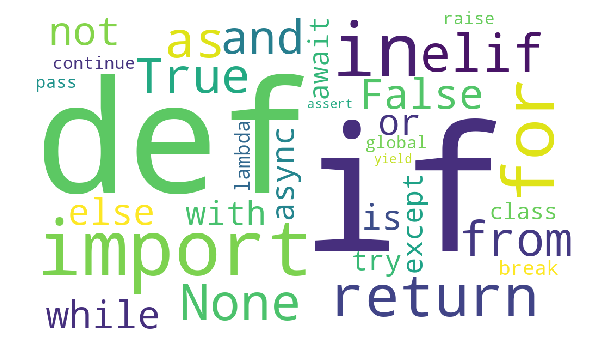

In [2]:
# 根据关键字频度生成词云图
wc = WordCloud(background_color='white', width=1000, height=600)
wc.generate_from_frequencies(kwdict)
plt.figure(figsize=(10, 6))
plt.axis("off")
plt.imshow(wc);

程序放入代码单元格运行即可输出结果，可以看到练习项目中出现的关键字共有 32 个，其中 if、def、import 最为常见（还有三个从未用过 del、finally、nonlocal）

如果想公开分享自己的笔记本，放到 GitHub 即可直接显示，不过渲染速度比较慢，推荐专用查看器 nbviewer https://nbviewer.jupyter.org/

欢迎查看我发布的笔记本 https://github.com/silkriver/pynote

——编程原来是这样……